# Lab-9: Convolutions and CNN

In this lab, you will practice convolutional operation and how to implement CNN using keras and tensorflow.


## Objectives:

1. Convolutions - application examples:
    - edge detection    
    - negation
    - blurring
    - sharpening
2. Building CNN in PyTorch / Keras / Tensorflow
    - example CNN
    - comparing with Fully-connected NN

### Recap

1. What is the use of convolutions?
2. Why use convolutional layers instead of fully-connected ones?

## Convolutions
Let's upload some image (you can try your own image changing the url)

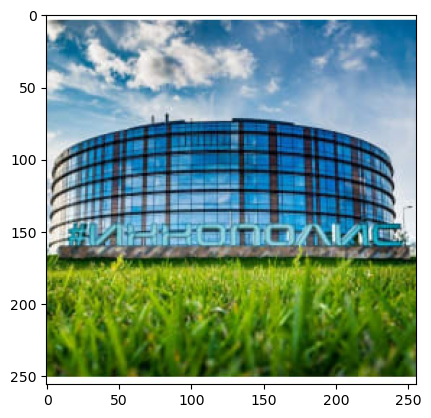

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy import ndimage

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras import models
from keras import datasets
from keras import losses
# from tensorflow.keras import datasets, layers, models, losses
import numpy as np

# Let's read and plot the image
image = plt.imread('grid_img.jpg')
plt.imshow(image)

original img shape:  (256, 256, 3)
grayscale img shape (256, 256)


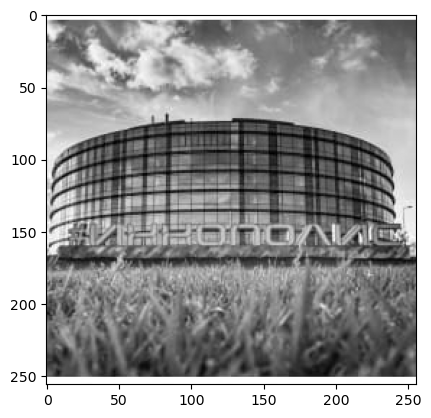

In [2]:
gray_image = rgb2gray(image)
plt.imshow(gray_image * 100, cmap='gray')
print("original img shape: ", image.shape)
print("grayscale img shape", gray_image.shape)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] is a kernel for detecting vertical edges


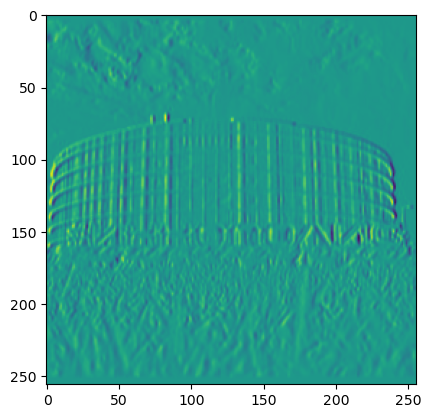

In [6]:
# first, let's define edge-detecting filters
horizontal_kernel = np.array([[1, 1, 1], 
                              [0, 0, 0], 
                              [-1, -1, -1]])
print(horizontal_kernel, 'is a kernel for detecting horizontal edges')
 
vertical_kernel = np.array([[-1, 0, 1], 
                            [-1, 0, 1], 
                            [-1, 0, 1]])
print(vertical_kernel, 'is a kernel for detecting vertical edges')

out_h = ndimage.convolve(gray_image, horizontal_kernel, mode='reflect')
out_v = ndimage.convolve(gray_image, vertical_kernel, mode='reflect')
# plt.imshow(out_h)
plt.imshow(out_v)

Let's apply different types of convolutions on this image. Complete the following function.

Take care of dimensions - the resuting image should be of the same size.
Hint:

![alt text](https://i.gyazo.com/5265866b07235dfa181de39913e94713.png)

Horizontal kernel applied


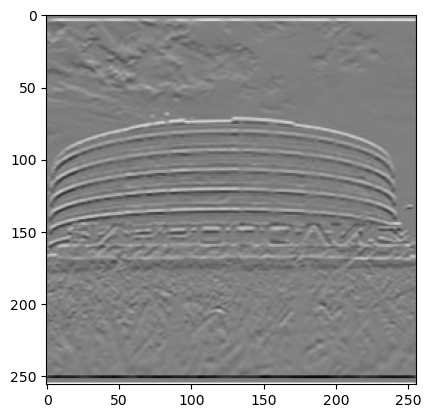

In [9]:
# apply kernel on input image such that the image size is preserved
def convolve(img, kernel):
        w, h = img.shape[0], img.shape[1]
        f = kernel.shape[0]
        # Write your code here
        # 1. Add padding p to img
        # 2. Go through the padded image pixels and compute the convolution: multiply subimage with kernel and sum the result
        p = (f - 1) // 2
        padding_img = np.lib.pad(img, ((p, p), (p, p)), 'constant', constant_values = ((0,0),(0,0)))
        result = np.zeros(img.shape)
        for i in range(h):
            for j in range(w):
                result [i, j] = np.sum(padding_img[i:i + f, j:j+f] * kernel)
        return result

c = convolve(gray_image, horizontal_kernel)
print("Horizontal kernel applied")
plt.imshow(c, cmap='gray')

Vertical kernel applied


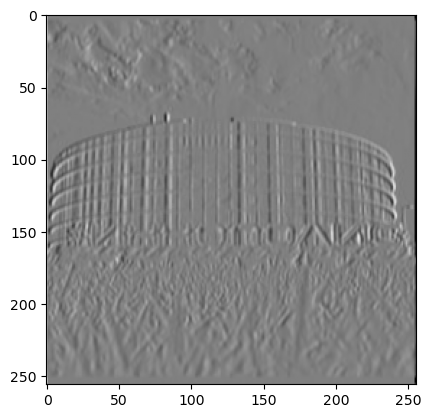

In [10]:
c = convolve(gray_image, vertical_kernel)
print("Vertical kernel applied")
plt.imshow(c, cmap='gray')

Let's see how the kernel affects the output result.
For this, we should set various values on the kernel.

Your kernel applied


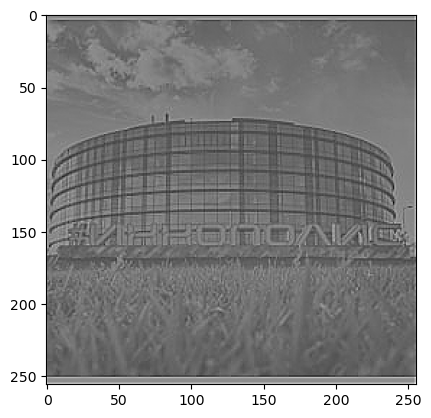

In [ ]:
# play with numbers, see how changing the kernel affects the result
# Повышаем резкость: создаем ядро, которое усиливает центральный пиксель и подавляет окружающие
your_kernel = np.array([[0, -1, 0],
                         [-1,  5, -1],
                         [0, -1, 0]])

c = convolve(gray_image, your_kernel)
print("Your kernel applied")
plt.imshow(c, cmap='gray')

some_kernel = np.array([[-1]])

Negative kernel applied


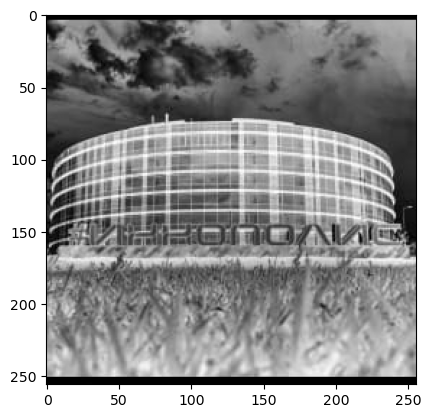

In [22]:
# Define the kernel that will result in reversed image, in which the lightest areas of
# the photographed subject appear darkest and the darkest areas appear the lightest.
# Write your code here
negative_kernel = np.array([[-1]])

c = convolve(gray_image, negative_kernel)
print("Negative kernel applied")
plt.imshow(c, cmap='gray')

Blur kernel applied


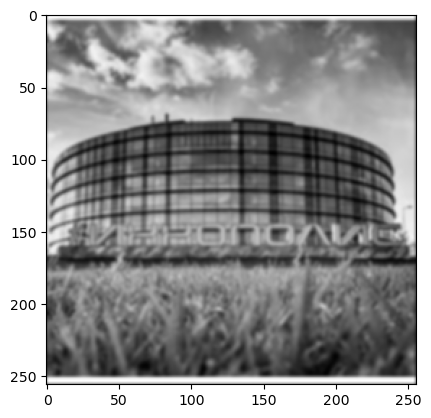

In [36]:
# Write your code here
# Define the kernel that will result in a blurred image
# How can we control the degree of blur?

def gaussian_kernel(size, sigma=1.0):
    """Creates a 2D Gaussian kernel."""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

kernel_size = 5
blur_kernel = gaussian_kernel(kernel_size, sigma=1)

#simple sum
blur_kernel2 = np.ones((11,11))

c_blurred = convolve(gray_image, blur_kernel)
print("Blur kernel applied")
plt.imshow(c_blurred, cmap='gray')

Sharpen kernel applied


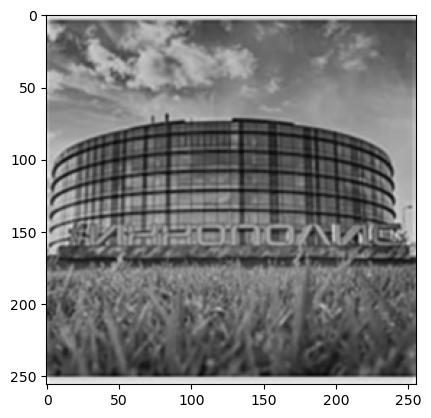

In [37]:
# Write your code here
# Now let's sharpen the blurred image back 
sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

c = convolve(c_blurred, sharpen_kernel)
print("Sharpen kernel applied")
plt.imshow(c, cmap='gray')

## Applying the ANN on the  MNIST dataset

Let's  load the MNIST dataset again (since we made some changes on the previously loaded dataset).

In [38]:

(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = datasets.mnist.load_data()

X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)


#Encoding the Labels
y_train_digit = keras.utils.to_categorical(y_train_digit, num_classes=10)

y_test_digit = keras.utils.to_categorical(y_test_digit, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Let's create ANN with the following architecture:

-> Dense ( where input=784 and with 128 units)

-> Dense with 24 units, with activation function relu

-> Dense with 24 units, with activation function relu

-> Dense with 10 units, with activation function sigmoid

In [39]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(24, activation='relu'),
    layers.Dense(24, activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,426 (407.91 KB)

 Trainable params: 104,426 (407.91 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

Let's train the ANN on the dataset.

In [42]:
history = model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=20, validation_split=0.1)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1652 - loss: 5.4301 - val_accuracy: 0.3857 - val_loss: 1.4903
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4387 - loss: 1.3986 - val_accuracy: 0.5828 - val_loss: 0.9981
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6348 - loss: 0.8464 - val_accuracy: 0.7235 - val_loss: 0.4871
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7496 - loss: 0.4708 - val_accuracy: 0.7758 - val_loss: 0.3798
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8069 - loss: 0.3525 - val_accuracy: 0.8480 - val_loss: 0.2708
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8593 - loss: 0.2480 - val_accuracy: 0.8590 - val_loss: 0.2177
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8733 - loss: 0.1837 - val_accuracy: 0.8938 - val_loss: 0.1936
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8891 - loss: 0.1492 - val_accuracy: 0.

Let's plot the diagram which shows the progress in loss of the model during the train:

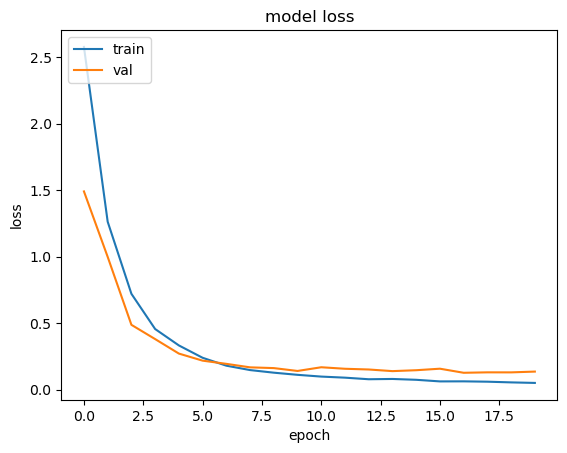

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We can also plot the diagram which shows the progress of the model with regard to its accuracy.

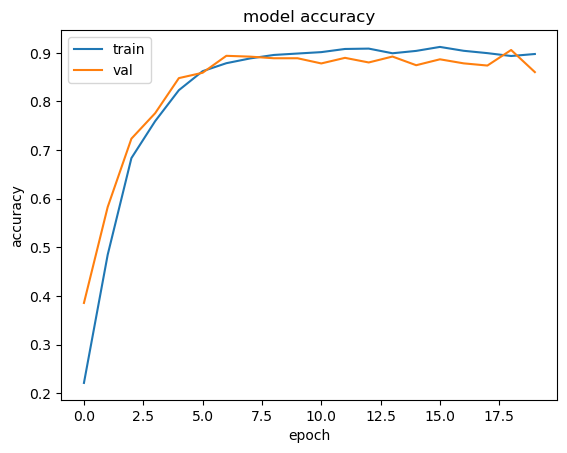

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluate the trained model

In [45]:
score = model.evaluate(X_test_digit, y_test_digit, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1296604871749878
Test accuracy: 0.8712999820709229


As you can judge from the results, the ANN has around 104K params and we spent 20 epochs on achieving such an accuracy.

Now let's see how CNN could solve such problems easier.

## Building a CNN using PyTorch

First, let's import the torch library, and we will also try to set the device to GPU if available

In [46]:
import torch

In [47]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [51]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

100%|██████████| 9.91M/9.91M [00:09<00:00, 1.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 222kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.02MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 611kB/s]


### Get familiar with dataset

Train dataset info

In [52]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


Test dataset info

In [53]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


Get familiar with the shapes of the dataset

In [54]:
print(f"train dataset shape: {train_data.data.size()}")
print(f"target shape: {train_data.targets.size()}")

train dataset shape: torch.Size([60000, 28, 28])
target shape: torch.Size([60000])


## Visualization of MNIST dataset

Let's plot one single data point

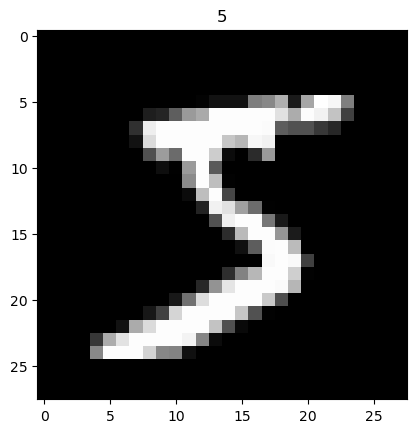

In [55]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

Now, let's plot multiple images

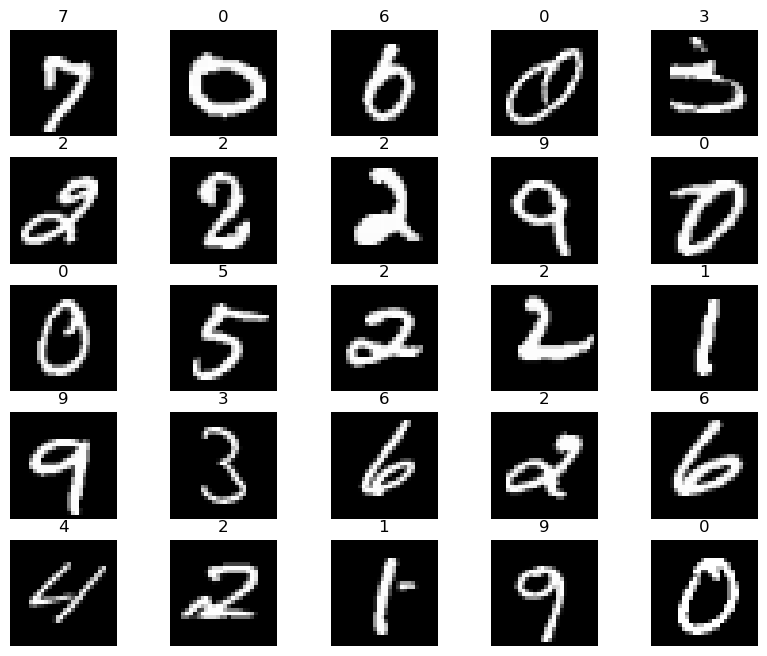

In [56]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Preparing data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [57]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2409b212060>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2409b233d70>}

#### 1. Regarding Conv2d
- 1.1  What is the main responsibility of the Conv2D layer?
- 1.2 What does filters number mean?
- 1.3 How can we interpret the kernel size?
- 1.4 What is the purpose of the relu actiation in Conv2D?

#### 2. Regarding MaxPooling
- 2.1 Why do we use MaxPooling2D in CNN?


#### 3. Regarding  Flatten

-  3.1 What is the purpose of the Flatten layer?

## The modules / classes in torch for CNN

Conv2d: Applies a 2D convolution over an input signal composed of several input planes.

Parameters

- in_channels (int) — Number of channels in the input image

- out_channels (int) — Number of channels produced by the convolution

- kernel_size (int or tuple) — Size of the convolving kernel

- stride (int or tuple, optional) — Stride of the convolution. Default: 1

- padding (int or tuple, optional) — Zero-padding added to both sides of the input. Default: 0

- padding_mode (string, optional) — ‘zeros’, ‘reflect’, ‘replicate’ or ‘circular’. Default: ‘zeros’

- dilation (int or tuple, optional) — Spacing between kernel elements. Default: 1

- groups (int, optional) — Number of blocked connections from input channels to output channels. Default: 1

- bias (bool, optional) — If True, adds a learnable bias to the output. Default: True

In [58]:
import torch.nn as nn


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            # Add another conv2d layer with relu and maxpooling
            # Write you code here
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=5,
                stride=1,
                padding=2
            ), 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        # Write you code here
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization


Commenting on the above mode:

- in_channels=1: because our input is a grayscale image.

- Stride: is the number of pixels to pass at a time when sliding the convolutional kernel.

- Padding: to preserve exactly the size of the input image, it is useful to add a zero padding on the border of the image.

- kernel_size: we need to define a kernel which is a small matrix of size 5 * 5. To perform the convolution operation, we just need to slide the kernel along the image horizontally and vertically and do the dot product of the kernel and the small portion of the image.

- The forward() pass defines the way we compute our output using the given layers and functions.

Now let's create the model based on the architecture specified in the above class:

In [59]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
cnn = CNN().to(device)
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


### Let's define a loss function

In [60]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

### Optimization Function

Now we will define optimization Function

In [61]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

### It's time to train the model!

Create a function called train() and pass num of epochs, model and data loaders as input parameters.

num_epochs: Number of times our model will go through the entire training dataset

In [62]:
from torch.autograd import Variable
num_epochs = 10


def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images.to(device))  # batch x
            b_y = Variable(labels.to(device))   # batch y

            output = cnn(b_x)[0].to(device)
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
train(num_epochs, cnn, loaders)


Epoch [1/10], Step [100/600], Loss: 0.0550
Epoch [1/10], Step [200/600], Loss: 0.2716
Epoch [1/10], Step [300/600], Loss: 0.0708
Epoch [1/10], Step [400/600], Loss: 0.0853
Epoch [1/10], Step [500/600], Loss: 0.2289
Epoch [1/10], Step [600/600], Loss: 0.1223
Epoch [2/10], Step [100/600], Loss: 0.0726
Epoch [2/10], Step [200/600], Loss: 0.1229
Epoch [2/10], Step [300/600], Loss: 0.0144
Epoch [2/10], Step [400/600], Loss: 0.0439
Epoch [2/10], Step [500/600], Loss: 0.0430
Epoch [2/10], Step [600/600], Loss: 0.0034
Epoch [3/10], Step [100/600], Loss: 0.0242
Epoch [3/10], Step [200/600], Loss: 0.0257
Epoch [3/10], Step [300/600], Loss: 0.0609
Epoch [3/10], Step [400/600], Loss: 0.0725
Epoch [3/10], Step [500/600], Loss: 0.0581
Epoch [3/10], Step [600/600], Loss: 0.0391
Epoch [4/10], Step [100/600], Loss: 0.0279
Epoch [4/10], Step [200/600], Loss: 0.0141
Epoch [4/10], Step [300/600], Loss: 0.0387
Epoch [4/10], Step [400/600], Loss: 0.0298
Epoch [4/10], Step [500/600], Loss: 0.1073
Epoch [4/10

### Evaluate the model on test data

We must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference.

model.train() tells your model that you are training the model. So effectively layers like dropout, batchnorm etc. which behave different on the train and test procedures know what is going on and hence can behave accordingly.

You can call either model.eval() or model.train(mode=False) to tell that you are testing the model.

In [63]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            images, labels = images.to(device), labels.to(device)
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

test()

Test Accuracy of the model on the 10000 test images: 0.97


## Building a CNN using Keras in Tensorflow platform

First, we will load the required libraries. The keras library on top of the tensorflow will be utilized.

Keras and TensorFlow are both open-source software. TensorFlow is a software library for machine learning. Keras runs on top of TensorFlow and expands the capabilities of the base machine-learning software. Keras also makes implementation, testing, and usage more user-friendly.

Keras works with TensorFlow to provide an interface in the Python programming language. It works by using layers and models.

In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses
import numpy as np

### Dataset

We will be experimenting the CNN technique on the MNIST (http://yann.lecun.com/exdb/mnist/) dataset which has 60,000 and 10,000 rows for the train and test sets, respectively.

Using keras library, we can load the MNIST dataset directly from the datasets package.

In [65]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [66]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

Exploring the dataset is an important phase. So we will get familiar with different aspects of the dataset.

In [67]:
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


Since most of the libraries and frameworks that work with image expect the input data to be in 4 dimension ($batch\_size \times height \times width \times channel\_for\_colors$) in order to support colored images as well, we should also add another dimension to our dataset to make it 4-dimensional dataset.

In [68]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_train.shape

(60000, 28, 28, 1)

Let's also get familiar with the labels.

In [69]:
y_train.shape

(60000,)

In [70]:
import pandas as pd
df_y_train = pd.DataFrame(y_train)
df_y_train.describe()

,0
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [71]:
df_y_train.head()

,0
0,5
1,0
2,4
3,1
4,9


As you can see, the labels just digits from 0 to 9.

To get visualised information about the dataset, let's plot some of the elements. 
For that, we will create a function which will plot an image with its label (digit).

In [72]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit: {}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

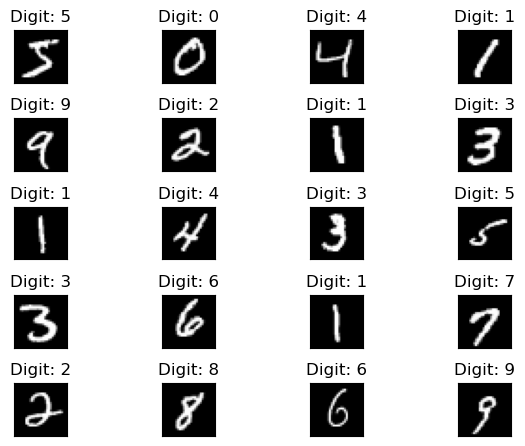

In [73]:
plot_digits(x_train, y_train)

Since the values of the dataset (x_train and x_test) lie between [0,255], we should normalize it.

In [74]:
# Write your code here
# write two lines of code that will make the pixels lie between [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

Let's convert the labels into binary class matricies, since we saw earlier that the labels are just in digits format.

In [78]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Let's create the sequental model of the keras for adding the layers of the CNN one by one.

The Sequential model should have the following architecture:

-> Input with shape $[128 \times 128 \times 1]$

-> Conv2D (32 filters; kernel size is $[3 \times 3]$; activation function is relu ) 

-> MaxPooling2D layer with pool size $[2 \times 2]$

-> Conv2D (64 filters; kernel size is $[3 \times 3]$; activation function is relu ) 

-> MaxPooling2D layer with pool size $[2 \times 2]$

-> Flatten

-> Dense layer with the softmax activation function (you should also specify the number of output classes)

In [79]:
# Write your code here
# implement the CNN model with the given architecture above
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Let's start the training process.  Before that, we should config the model with losses and metrics with model.compile().

In [80]:
batch_size = 128
epochs = 5
# Write your code here

# Write one line of code to compile the model with:
# - the categorical_crossentropy loss function
# - use adam as optimizer
# - use 'accuracy' as metrics
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Write one line of code to train the model:
# - set the size of the batch size
# - also, set train / validation dataset split as 90 / 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8182 - loss: 0.6372 - val_accuracy: 0.9792 - val_loss: 0.0756
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9762 - loss: 0.0807 - val_accuracy: 0.9813 - val_loss: 0.0649
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9829 - loss: 0.0575 - val_accuracy: 0.9853 - val_loss: 0.0485
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9862 - loss: 0.0450 - val_accuracy: 0.9870 - val_loss: 0.0431
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9881 - loss: 0.0375 - val_accuracy: 0.9885 - val_loss: 0.0398


Let's plot the diagram which shows the progress in loss of the model during the train:

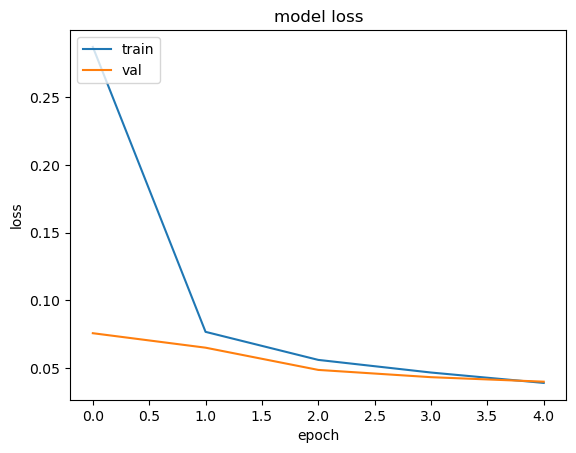

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We can also plot the diagram which shows the progress of the model with regard to its accuracy.

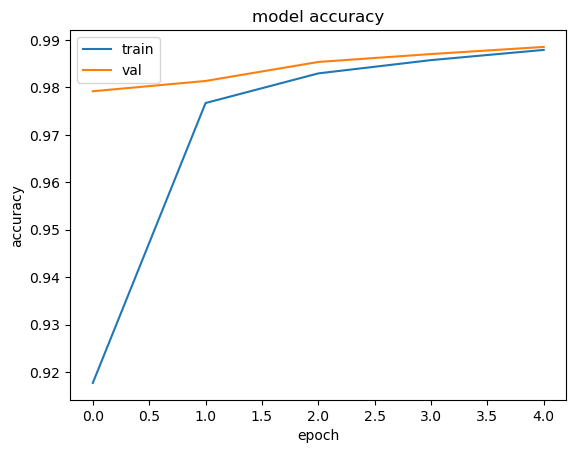

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluate the trained model

In [83]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04237411916255951
Test accuracy: 0.9860000014305115


As you can judge from the results, the CNN achieved higher accuracy with less number of parameters (~ 32K) and in less epochs, while the ANN has around 104K params and we spent 20 epochs on achieving less accuracy.

References:

- https://phoenixnap.com/kb/how-to-install-keras-on-linux
- https://www.quora.com/What-is-the-meaning-of-a-filter-size-in-a-CNN
- https://stats.stackexchange.com/questions/363190/why-we-use-activation-function-after-convolution-layer-in-convolution-neural-net
- https://medium.com/analytics-vidhya/applying-ann-digit-and-fashion-mnist-13accfc44660
- https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118